# Actividad Clase 5

Utilizaremos un conjunto de datos que nos interese trabajar y mediante la
implementación de los algoritmos Árbol de Decisión y K-NN, evaluaremos y
compararemos la precisión de los clasificadores generados.

En el trabajo de esta dataset vamos a tratar de predecir a que conjunto o categoria pertenece un tipo de vino segun sus caracteristicas.


In [22]:
#Importar librerías
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine #Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
#Cargar dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name="target") #para predecir

print("Dimensiones del dataset:", X.shape)
X.head()

Dimensiones del dataset: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


##Limpieza y preparación de los datos.
A pesar de que los datos de prueba ya son parte de un dataset común para este ejercicio, es importante hacer una limpieza y preparación previa para asegurar la calidad y evitar errores.

In [24]:
#Limpieza y preparación

# Verificar nulos
print("Valores nulos:\n", X.isnull().sum().sum())

# Resumen estadístico
print("\nResumen estadístico:\n", X.describe())

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertimos a DataFrame de nuevo para visualización
X_scaled_df = pd.DataFrame(X_scaled, columns=wine.feature_names)
X_scaled_df.head()


Valores nulos:
 0

Resumen estadístico:
           alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [40]:
# Combinación para crear un solo df para graficar
df = X.copy()
df['target'] = y

print("Primeras 5 filas del DataFrame para EDA (Características + Target):")
print(df.head())

Primeras 5 filas del DataFrame para EDA (Características + Target):
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.0

 Matriz de Correlación


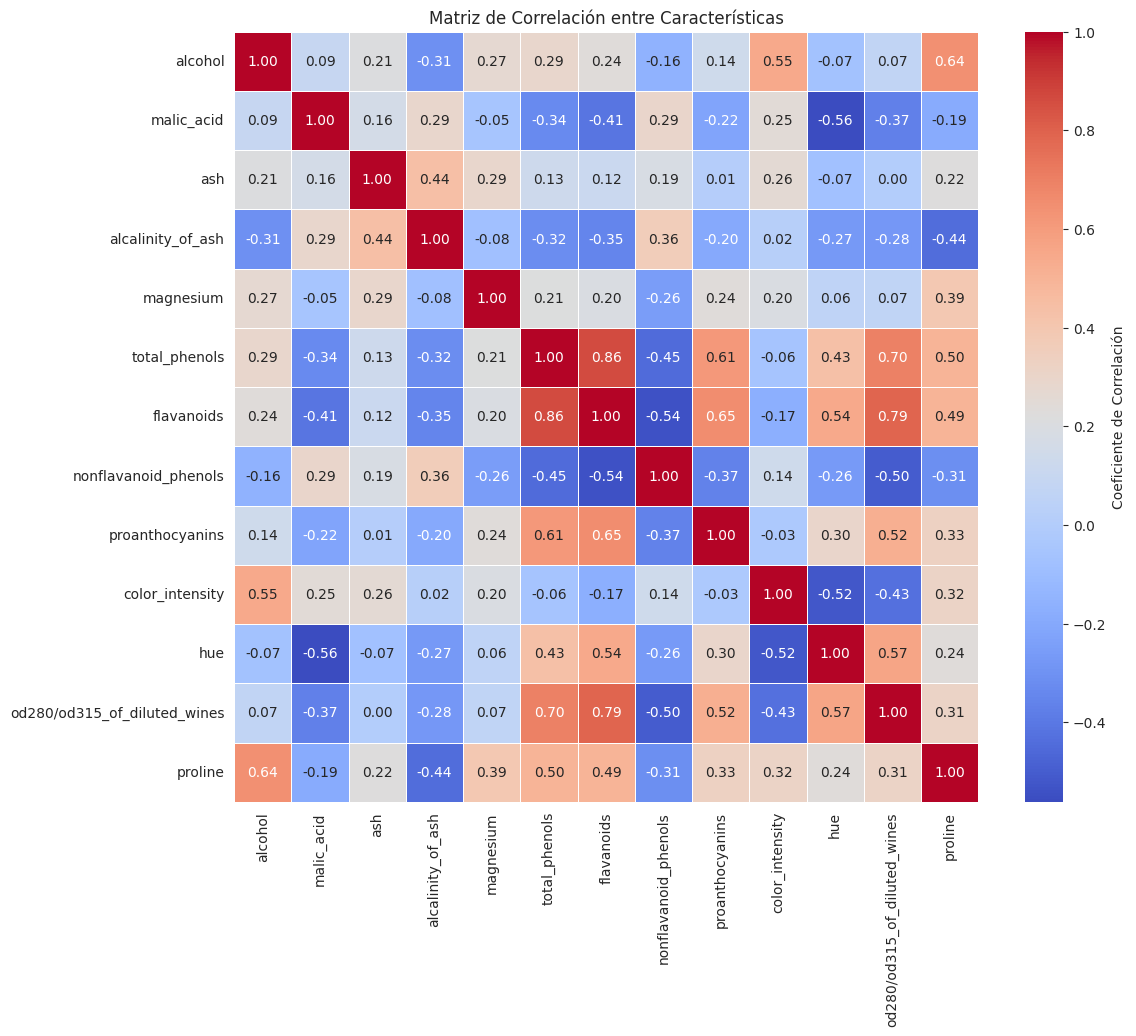

In [43]:
print(" Matriz de Correlación")

# Calcular la matriz de correlación usando X (solo características)
correlacion = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlacion,
    annot=True,        # Mostrar el valor de la correlación
    fmt=".2f",         # Formato a dos decimales
    cmap='coolwarm',   # Mapa de colores para visualizar la intensidad
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlación'}
)
plt.title('Matriz de Correlación entre Características')
plt.show()
#

La matriz de correlación del dataset Wine permite identificar relaciones lineales entre las distintas características químicas de muestras de vino. Los coeficientes de correlación varían entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta), y se representan visualmente mediante un gradiente de color.

Principales observaciones:

Correlaciones fuertes positivas:

Alcohol y OD280/OD315: Alta correlación positiva. Esto sugiere que vinos con mayor contenido de alcohol tienden a tener mayor absorbancia en la medición OD280/OD315, relacionada con compuestos fenólicos.

Total_phenols y Flavanoids: Correlación cercana a 1. Indica que los flavonoides son una parte importante del total de compuestos fenólicos.

Color_intensity y Proanthocyanins: También presentan una correlación positiva significativa, lo que sugiere que los pigmentos están relacionados con estos compuestos.

Correlaciones fuertes negativas:

Flavanoids y Nonflavanoid_phenols: Correlación negativa. Esto puede indicar que a mayor presencia de flavonoides, menor proporción de compuestos fenólicos no flavonoides.

Hue y Color_intensity: Correlación negativa. A medida que aumenta la intensidad del color, el matiz tiende a disminuir.

Correlaciones débiles o nulas:

Ash y Alcohol: Correlación cercana a cero, lo que indica que no hay una relación lineal clara entre estas variables.

Magnesium con la mayoría de las otras variables: Presenta correlaciones bajas, lo que sugiere que su influencia es limitada en el conjunto de características.

 Gráfico de Pares por Clase


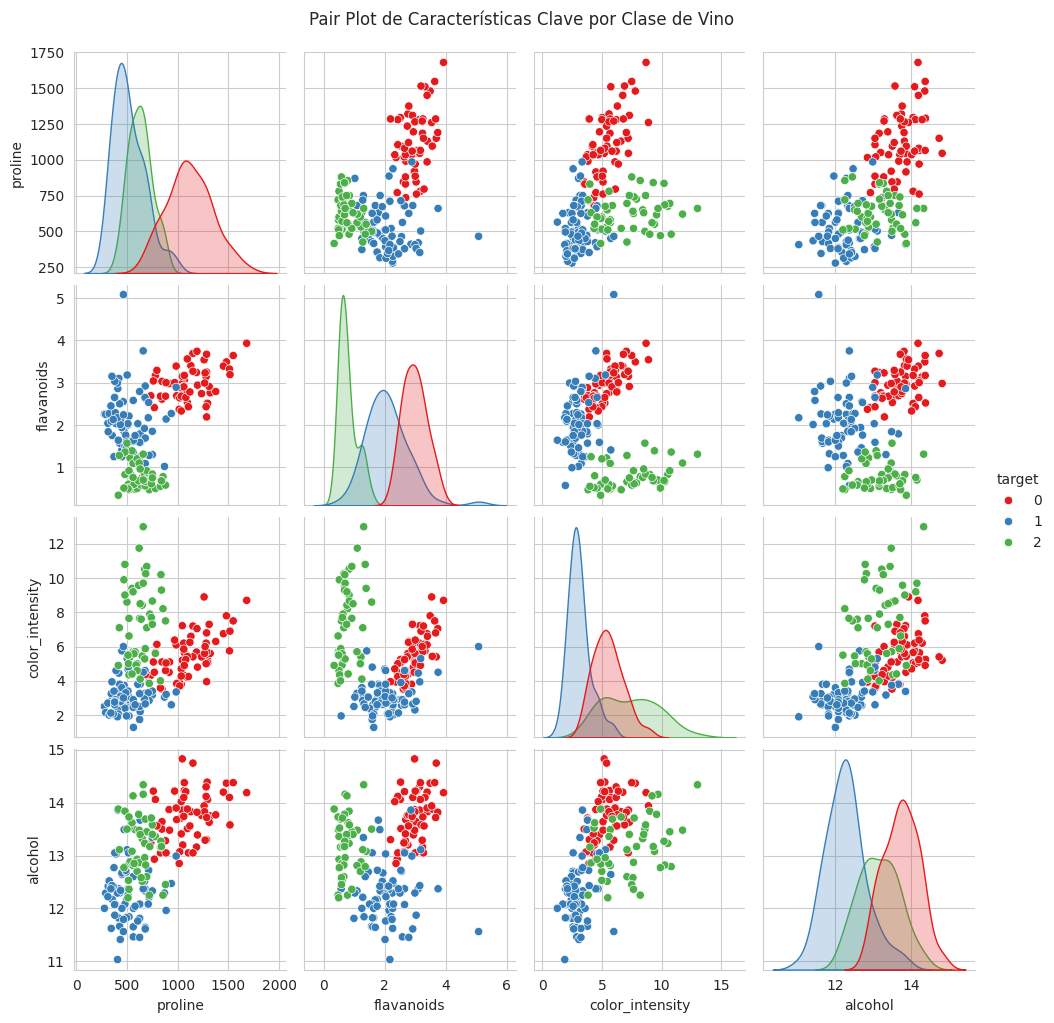

In [44]:
print(" Gráfico de Pares por Clase")

# Seleccionamos un subconjunto de características (las más discriminativas)
caracteristicas_seleccionadas = [
    'proline',
    'flavanoids',
    'color_intensity',
    'alcohol',
    'target'
]

df['target'] = df['target'].astype('category')

sns.pairplot(
    df[caracteristicas_seleccionadas],
    hue='target',  # Colorear los puntos según la clase de vino
    palette='Set1',
    diag_kind='kde' # Muestra la distribución de densidad en la diagonal
)
plt.suptitle('Pair Plot de Características Clave por Clase de Vino', y=1.02)
plt.show()
#

Distribuciones individuales:

Alcohol: Las clases 0 y 1 tienen distribuciones bien diferenciadas, mientras que la clase 2 se solapa parcialmente.

Flavanoids: La clase 1 se distingue claramente con valores más bajos, mientras que las clases 0 y 2 tienen mayor concentración.

Color_intensity: La clase 2 muestra valores más altos en general, lo que puede ser un buen indicador para su identificación.

Proline: La clase 2 tiene una distribución claramente desplazada hacia valores más altos, lo que sugiere que esta variable es útil para distinguirla.

Relaciones entre variables:

Alcohol vs Flavanoids: Existe una relación positiva, especialmente marcada en la clase 0.

Color_intensity vs Proline: Se observa una correlación positiva, especialmente en la clase 2.

Flavanoids vs Proline: Las clases se agrupan de forma bastante separada, lo que indica que estas dos variables combinadas pueden ser útiles para clasificación.

Separabilidad entre clases:

Las clases 0, 1 y 2 muestran patrones distintos en varias combinaciones de variables, lo que sugiere que estas características son útiles para modelos de clasificación.

La clase 1 tiende a tener valores más bajos en flavanoids y alcohol, mientras que la clase 2 se destaca por valores altos en proline y color_intensity.

#Separación para el entrenamiento y testeo

In [25]:
# Separar en train/test (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de test:", X_test.shape)


Tamaño de entrenamiento: (124, 13)
Tamaño de test: (54, 13)


#Modelado KNN y Arbol de decisión

In [26]:
# Importar librerías para KNN y el Árbol
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

## Modelo KNN

In [55]:
knn = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(" Informe KNN ")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=wine.target_names))

 Informe KNN 
Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       1.00      0.86      0.92        21
     class_2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



--Clase 0

Precision = 1.00 → Cada vez que el modelo predijo clase 0, acertó 100% de las veces.

Recall = 1.00 → El modelo detectó todos los casos reales de clase 0.

F1 = 1.00 → Perfecto balance entre precision y recall.
Conclusión: Clase 0 está perfectamente predicha.

--Clase 1

Precision = 1.00 → Todas las predicciones de clase 1 fueron correctas (no hay falsos positivos).

Recall = 0.86 → Detectó 86% de los casos reales de clase 1, se le escaparon algunos (falsos negativos).

F1 = 0.92 → Buen balance, aunque no perfecto.
Conclusión: Muy buena precisión, pero el modelo falla un poco al no identificar todos los positivos de clase 1.

--Clase 2

Precision = 0.83 → Algunas predicciones de clase 2 eran incorrectas (falsos positivos).

Recall = 1.00 → Detectó todos los casos reales de clase 2.

F1 = 0.91 → Balance decente, aunque la precision baja arrastra un poco el F1.
Conclusión: El modelo encuentra todos los casos reales (recall perfecto), pero a veces etiqueta mal otras clases como clase 2 (precision baja).

--Promedios

Macro avg: simple promedio de las métricas por clase → refleja que globalmente el modelo tiene recall alto (0.95) y precision/f1 alrededor de 0.94.

Weighted avg: ponderado por cantidad de ejemplos por clase → muy similar, mostrando consistencia general.

--Conclusión general

El modelo detecta casi todos los positivos reales (recall alto, 0.95 macro).

La precisión global es muy buena (0.94-0.95), aunque la clase 2 baja un poco.

El F1 score alto (0.94) confirma que hay un buen balance entre no cometer falsos positivos y no perder positivos reales.

La mayor debilidad está en la clase 1 (recall < 1) y la clase 2 (precision < 1), lo que indica áreas para ajustar el modelo o los datos.

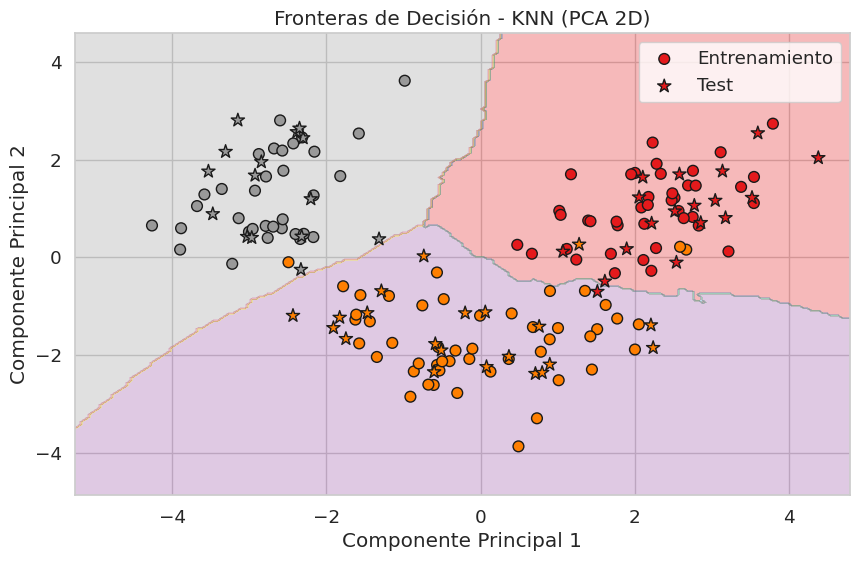

In [63]:
# PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar KNN en 2D
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_pca, y_train)

# Fronteras
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Grafico Fronteras
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)

# puntos de entrenamiento
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, cmap=plt.cm.Set1, edgecolor="k", s=60, label="Entrenamiento")

# puntos de prueba
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
            c=y_test, cmap=plt.cm.Set1, edgecolor="k", marker="*", s=100, label="Test")

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Fronteras de Decisión - KNN (PCA 2D)")
plt.legend()
plt.show()


Para este grafico de KNN podemos ver que en rosa celeste y gris claro son las zonas de decisión
Los circulos son los datos de entrenamiento (70%) y las estrellas sin los datos de testeo (30%)

###Un punto de testeo

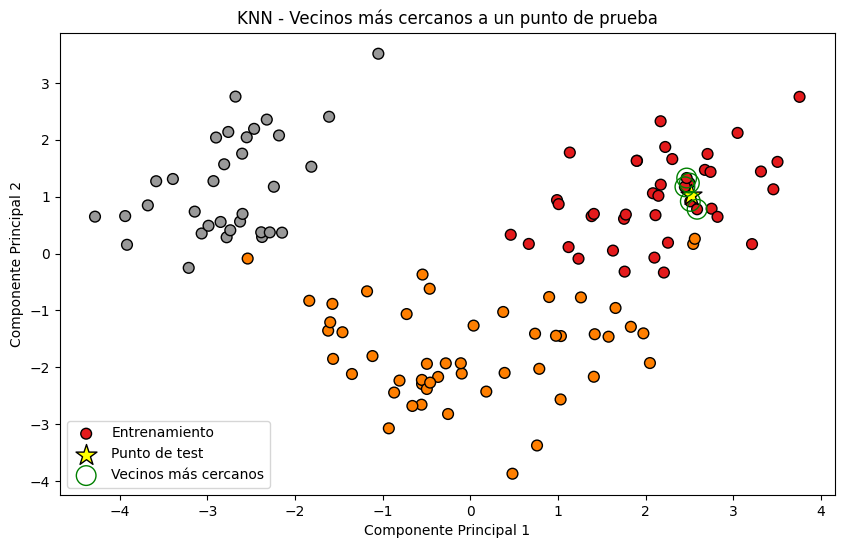

Nuestro punto de testeo: [2.51674015 1.0311513 ]


In [29]:


# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Entrenamos KNN en 2D
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_pca, y_train_pca)

# Elegimos un punto de test
test_point = X_test_pca[0].reshape(1, -1)



# Usamos NearestNeighbors para encontrar los 5 vecinos más cercanos
nn = NearestNeighbors(n_neighbors=5)
nn.fit(X_train_pca)
distances, indices = nn.kneighbors(test_point)

#  todos los puntos
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_pca, cmap=plt.cm.Set1, edgecolor="k", s=60, label="Entrenamiento")

# punto de prueba
plt.scatter(test_point[:,0], test_point[:,1], c="yellow", edgecolor="black", marker="*", s=250, label="Punto de test")

# vecinos más cercanos
plt.scatter(X_train_pca[indices[0],0], X_train_pca[indices[0],1], facecolors="none", edgecolors="green", s=200, linewidths=1, label="Vecinos más cercanos")

plt.title("KNN - Vecinos más cercanos a un punto de prueba")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()

print(f'Nuestro punto de testeo: {X_test_pca[0]}')



### Usando varios puntos de testeo no solo 1

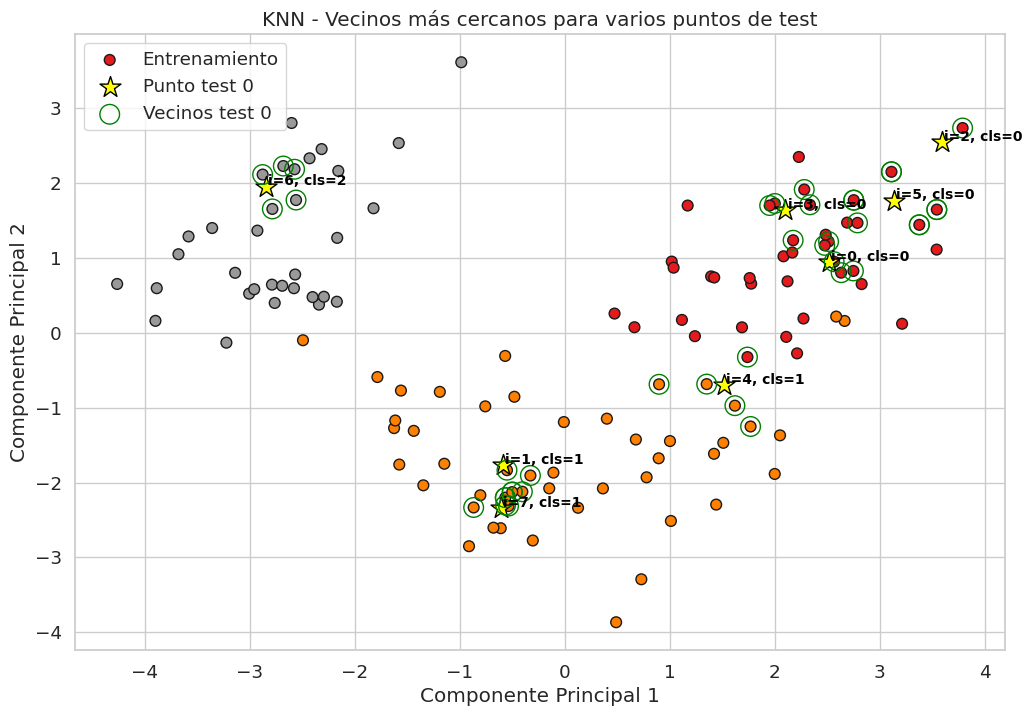

In [68]:
num_test_points = 8

plt.figure(figsize=(12,8))

# Graficamos puntos de entrenamiento
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train_pca,
            cmap=plt.cm.Set1, edgecolor="k", s=60, label="Entrenamiento")

for i in range(num_test_points):
    test_point = X_test_pca[i].reshape(1, -1)

    # Vecinos más cercanos
    nn = NearestNeighbors(n_neighbors=5)
    nn.fit(X_train_pca)
    distances, indices = nn.kneighbors(test_point)

    # Punto de test
    plt.scatter(test_point[:,0], test_point[:,1],
                c="yellow", edgecolor="black", marker="*", s=250, label=f"Punto test {i}" if i==0 else "")

    # Agregar etiqueta con índice y clase predicha
    pred_label = knn_2d.predict(test_point)[0]  # usando el KNN entrenado en 2D
    plt.text(test_point[:,0]+0.02, test_point[:,1]+0.02, f"i={i}, cls={pred_label}",
             fontsize=10, fontweight='bold', color='black')

    # Vecinos más cercanos
    plt.scatter(X_train_pca[indices[0],0], X_train_pca[indices[0],1],
                facecolors="none", edgecolors="green", s=200, linewidths=1, label=f"Vecinos test {i}" if i==0 else "")

plt.title("KNN - Vecinos más cercanos para varios puntos de test")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()



### Utilización de peso y distancia


In [31]:
# Entrenamos dos modelos KNN con distintos pesos
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights="uniform")
knn_uniform.fit(X_train, y_train)

knn_distance = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn_distance.fit(X_train, y_train)



# nuevos puntos artificiales (con las 13 caracteristicas del data set original)
# como ya escalamos X, los valores deben estar en la escala transformada

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Xn = np.array([
    X_scaled.mean(axis=0),         # valores promedio
    X_scaled.max(axis=0),          # valores extremos
    X_scaled.min(axis=0)           # valores atípicos
])


# Predicciones con ambos métodos
Yn_uniform = knn_uniform.predict(Xn)
Yn_distance = knn_distance.predict(Xn)

print("Predicciones con weights='peso':", Yn_uniform)
print("Predicciones con weights='distancia':", Yn_distance)


Predicciones con weights='peso': [0 0 1]
Predicciones con weights='distancia': [0 0 1]


KNN toma como que “el vino promedio” y “el vino con valores máximos” son de clase 0, y “el vino con valores mínimos” es de clase 1. Nada de aciertos o errores aquí, solo predicciones.

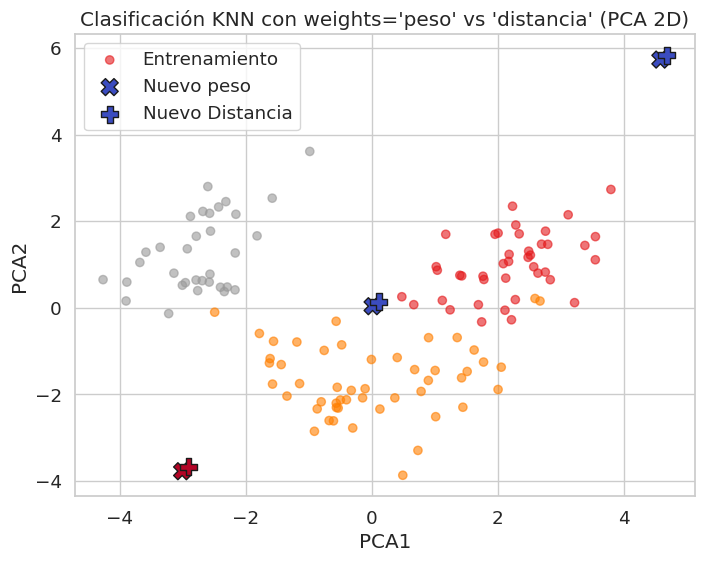

In [64]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
Xn_2d = pca.transform(Xn)

# Graficamos los datos de entrenamiento
plt.figure(figsize=(8,6))
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, cmap=plt.cm.Set1, alpha=0.6, label='Entrenamiento')

# Nuevos puntos con predicción uniform
plt.scatter(Xn_2d[:,0], Xn_2d[:,1], c=Yn_uniform, marker='X', s=150, cmap='coolwarm', edgecolor='k', label='Nuevo peso')

# Nuevos puntos con predicción distance (los desplazamos un poco para ver ambos)
plt.scatter(Xn_2d[:,0]+0.1, Xn_2d[:,1]+0.1, c=Yn_distance, marker='P', s=150, cmap='coolwarm', edgecolor='k', label='Nuevo Distancia')

plt.title("Clasificación KNN con weights='peso' vs 'distancia' (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

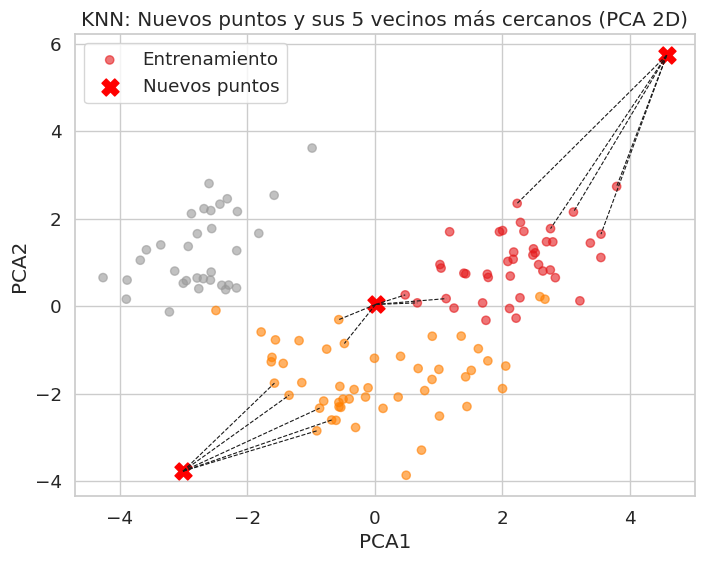

In [65]:
# Usamos la misma PCA de antes para reducir dimensionalidad a 2D
X_train_2d = pca.transform(X_train)
Xn_2d = pca.transform(Xn)

# Creamos objeto NearestNeighbors para encontrar vecinos
nn = NearestNeighbors(n_neighbors=5)
nn.fit(X_train_2d)

# Encontramos vecinos para cada nuevo punto
distances, indices = nn.kneighbors(Xn_2d)

plt.figure(figsize=(8,6))
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_train, cmap= plt.cm.Set1, alpha=0.6, label='Entrenamiento')
plt.scatter(Xn_2d[:,0], Xn_2d[:,1], c='red', marker='X', s=150, label='Nuevos puntos')

# Dibujamos líneas hacia los vecinos
for i, point in enumerate(Xn_2d):
    for idx in indices[i]:
        neighbor = X_train_2d[idx]
        plt.plot([point[0], neighbor[0]], [point[1], neighbor[1]], 'k--', linewidth=0.8)

plt.title("KNN: Nuevos puntos y sus 5 vecinos más cercanos (PCA 2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

## Arbol de decisión

In [34]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("\n Árbol de Decisión ")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=wine.target_names))


 Árbol de Decisión 
Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

     class_0       1.00      0.94      0.97        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



Clase 0

Precision = 1.00 → Todas las predicciones de clase 0 fueron correctas (sin falsos positivos).

Recall = 0.94 → Detectó el 94% de los casos reales de clase 0 (se le escapó algún positivo).

F1 = 0.97 → Muy buen balance.
Conclusión: Clase 0 muy bien predicha, aunque perdió algún ejemplo real.

Clase 1

Precision = 0.91 → Algunas predicciones fueron incorrectas (falsos positivos).

Recall = 1.00 → Capturó todos los casos reales de clase 1.

F1 = 0.95 → Balance alto.
Conclusión: El modelo detecta todos los positivos reales, aunque a veces etiqueta mal otros como clase 1.

Clase 2

Precision = 1.00 → Todas las predicciones de clase 2 fueron correctas.

Recall = 0.93 → Detectó el 93% de los casos reales (se perdió algún positivo).

F1 = 0.97 → Excelente.
Conclusión: Muy buena predicción, solo algunos casos reales de clase 2 se escaparon.

Promedios

Macro avg: precision 0.97, recall 0.96, f1 0.96 → excelente desempeño global.

Weighted avg: casi igual, mostrando consistencia considerando el número de ejemplos por clase.

Conclusión general

El accuracy global = 0.963 indica que el árbol clasificó correctamente la gran mayoría de los casos.

El recall sigue siendo alto (0.96 macro), mostrando que pocos positivos reales se pierden.

La precision también es muy alta (0.97), por lo que hay pocos falsos positivos.

F1 score = 0.96 → muy buen equilibrio entre precisión y recall.

Comparando con KNN:

Árbol de Decisión tiene un accuracy ligeramente mayor.

Más balance en precisión y recall entre clases.

KNN tenía recall perfecto en clase 2 pero menor precision; Árbol de Decisión logra mejor equilibrio.

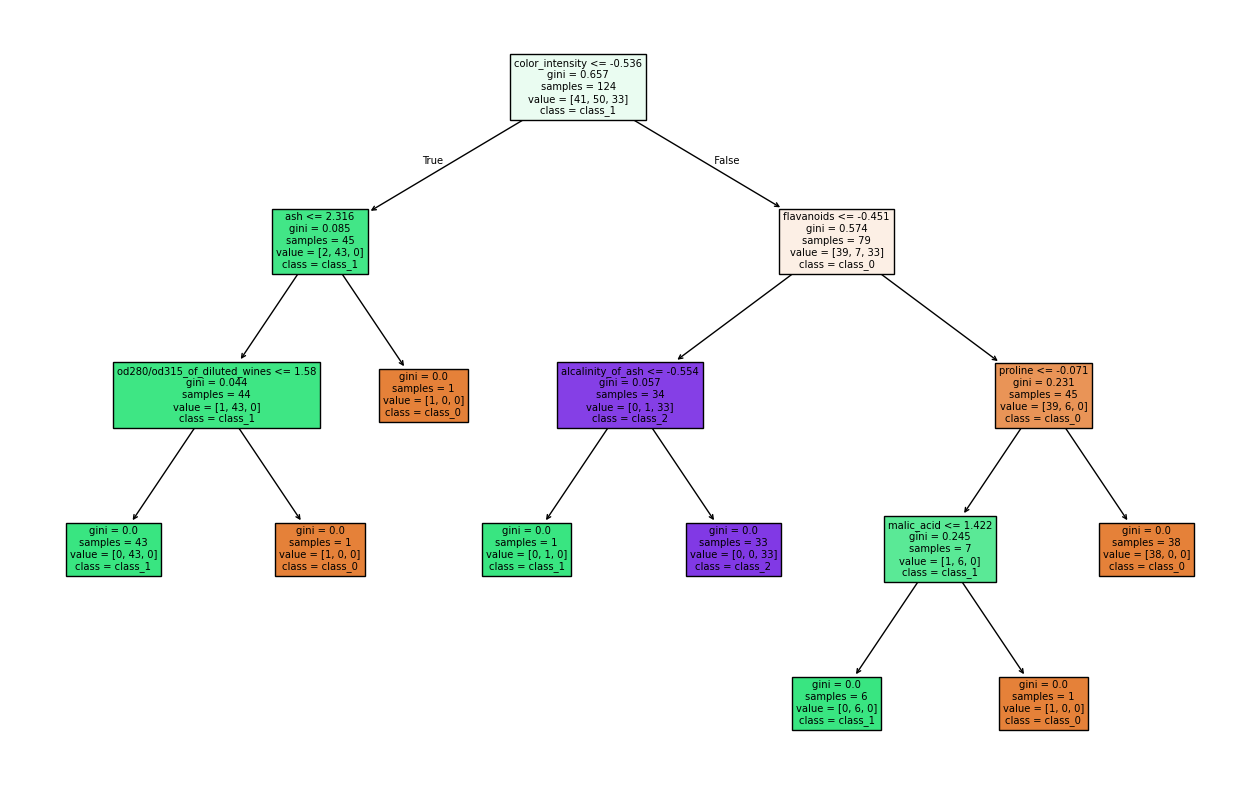

In [35]:
plt.figure(figsize=(16,10))
plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

### Matriz de confunción para comparación

--- Matriz de Confusión: K-NN ---
[[18  0  0]
 [ 0 18  3]
 [ 0  0 15]]

--- Matriz de Confusión: Árbol de Decisión ---
[[17  1  0]
 [ 0 21  0]
 [ 0  1 14]]


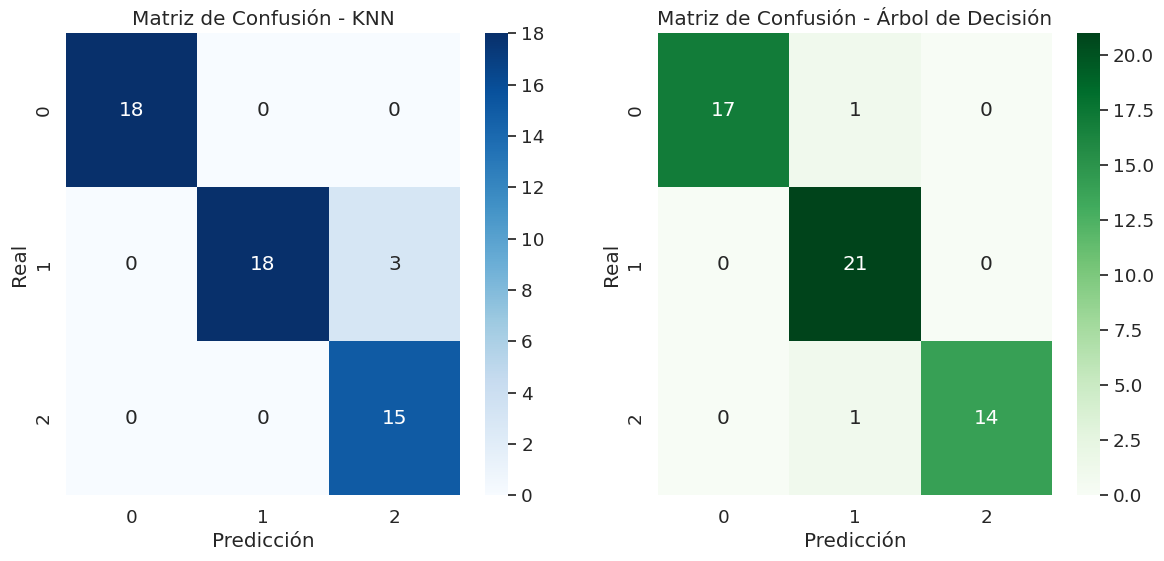

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Matriz de Confusión - KNN")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")


sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Matriz de Confusión - Árbol de Decisión")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.show()


El K-NN cometió 3 errores (Falsos Negativos): tres instancias que eran realmente de la Clase 1 fueron clasificadas incorrectamente como Clase 2.
 Esto indica que el límite de decisión entre el Tipo de Vino 1 y el Tipo de Vino 2 es la principal debilidad del modelo K-NN.

Aciertos Totales: 18+18+15=51
Errores Totales: 3
Precisión Global (Accuracy): 51/54≈94.4%

El Árbol de Decisión cometió solo 2 errores, demostrando una mayor precisión general:
1 Falso Negativo (Clase 0): Una instancia real de la Clase 0 fue confundida con la Clase 1.
1 Falso Positivo (Clase 1): Una instancia real de la Clase 2 fue clasificada incorrectamente como Clase 1.

Aciertos Totales: 17+21+14=52
Errores Totales: 2
Precisión Global (Accuracy): 52/54≈96.3%

In [54]:

# wine.target_names es útil para etiquetar las clases (si usas el dataset wine)
target_names = ['Class 0', 'Class 1', 'Class 2'] # o usar wine.target_names si está disponible

# 1. Reporte de Métricas para K-NN
print("\n=== REPORTE DE CLASIFICACIÓN: K-NN ===")
print(classification_report(y_test, y_pred_knn, target_names=target_names))

# 2. Reporte de Métricas para Árbol de Decisión
print("\n=== REPORTE DE CLASIFICACIÓN: ÁRBOL DE DECISIÓN ===")
print(classification_report(y_test, y_pred_tree, target_names=target_names))


=== REPORTE DE CLASIFICACIÓN: K-NN ===
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        18
     Class 1       1.00      0.86      0.92        21
     Class 2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


=== REPORTE DE CLASIFICACIÓN: ÁRBOL DE DECISIÓN ===
              precision    recall  f1-score   support

     Class 0       1.00      0.94      0.97        18
     Class 1       0.91      1.00      0.95        21
     Class 2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



### Analisis entre la clasificación KNN y Arbol

El Árbol de Decisión es el modelo con la mayor precisión global (96%), superando ligeramente al K-NN (94%). Ambos modelos demuestran un rendimiento extremadamente alto y robusto para este problema de clasificación. El objetivo principal de la optimización será validar si este 96% es el máximo posible o si se puede mejorar el 94% del K-NN.


Clase 0 (Tipo de Vino 0):
Rendimiento Perfecto: Ambos modelos demuestran una Precisión y Exhaustividad (Recall) de 1.00 o muy cercana. Esto significa que la Clase 0 es la más fácil de identificar y que las fronteras de decisión aprendidas son claras para esta categoría.

Clase 1 (Tipo de Vino 1):
Fortaleza del Árbol de Decisión: El Árbol de Decisión logra un Recall perfecto de 1.00, lo que indica que logró identificar todas las 21 instancias reales de la Clase 1 (cero Falsos Negativos).

Debilidad del K-NN: El K-NN presenta un Recall más bajo (0.86), lo que implica que falló en clasificar correctamente un 14% de las instancias de la Clase 1, confundiéndolas probablemente con otra clase (generalmente Clase 2).

Clase 2 (Tipo de Vino 2):
Fortaleza del Árbol de Decisión: El Árbol de Decisión obtiene una Precision de 1.00, lo que significa que todas las instancias que predijo como Clase 2 fueron correctas.

Debilidad del K-NN: El K-NN presenta una Precision baja (0.83). Esto sugiere que el 17% de las instancias que el K-NN etiquetó como Clase 2 eran en realidad de otra clase (generalmente Clase 1).

-- Conclusión
Conclusión Principal:

El Árbol de Decisión es el mas presiso , no solo por tener una precisión global más alta, sino por mostrar un rendimiento más equilibrado y consistente en todas las clases, sin cometer Falsos Positivos en la Clase 2 ni Falsos Negativos en la Clase 1.

Este analisis se llevo a cabo para comprar cual de los dos modelos es mejor para la predicción. dando como resultado el Arbol de decisión